In [ ]:
import numpy as np
import cvxpy as cp

# Constants
m = 20
n = 20
r = 1
p = 0.1
lambda_ = 0.25

#  low-rank matrix
A = np.random.randn(m, n)
U, S, V = np.linalg.svd(A, full_matrices=False)
L0 = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]


E0 = np.random.rand(m, n)
S0 = 1 * (E0 > (1 - p))
X = L0 + S0

#  variables
L = cp.Variable((m, n))
S = cp.Variable((m, n))
W1 = cp.Variable((m, n))
W2 = cp.Variable((m, n))


#  problem
objective = cp.Minimize(0.5 * cp.trace(W1) + 0.5 * cp.trace(W2) + lambda_ * cp.sum(cp.abs(S)))
constraints = [L + S >= X - 1e-5, L + S <= X + 1e-5, cp.bmat([[W1, L], [L.T, W2]])>>0]
problem = cp.Problem(objective, constraints)

# Solve problem
problem.solve()

# Check
if problem.status == 'optimal':
    # Calculate differences
    norm_fro_S = np.linalg.norm(S.value - S0, ord='fro')
    norm_fro_L = np.linalg.norm(L.value - L0, ord='fro')

    # D
    print("||S - S0||_fro:", norm_fro_S)
    print("||L - L0||_fro:", norm_fro_L)

    # C success
    if norm_fro_S < 1e-3 and norm_fro_L < 1e-3:
        print("Success")
    else:
        print("Failure")
else:
    print("Optimization problem was not solved successfully.")

||S - S0||_fro: 9.125303017785601e-05
||L - L0||_fro: 6.259104685705664e-05
Success


In [ ]:
def solve_RPCA(m,n, r, p):

  #  low-rank matrix
 A = np.random.randn(m, n)
 U, S, V = np.linalg.svd(A, full_matrices=False)
 L0 = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]


 E0 = np.random.rand(m, n)
 S0 = 1 * (E0 > (1 - p))
 X = L0 + S0

#  variables
 L = cp.Variable((m, n))
 S = cp.Variable((m, n))
 W1 = cp.Variable((m, n))
 W2 = cp.Variable((m, n))


#  problem
 objective = cp.Minimize(0.5 * cp.trace(W1) + 0.5 * cp.trace(W2) + lambda_ * cp.sum(cp.abs(S)))
 constraints = [L + S >= X - 1e-5, L + S <= X + 1e-5, cp.bmat([[W1, L], [L.T, W2]])>>0]
 problem = cp.Problem(objective, constraints)

# Solve problem
 problem.solve()

# Check
 if problem.status == 'optimal':

    # Calculate differences
    norm_fro_S = np.linalg.norm(S.value - S0, ord='fro')
    norm_fro_L = np.linalg.norm(L.value - L0, ord='fro')

    # D
    print("||S - S0||_fro:", norm_fro_S)
    print("||L - L0||_fro:", norm_fro_L)

    # C success
    if norm_fro_S < 1e-3 and norm_fro_L < 1e-3:
        print("Success")
    else:
        print("Failure")
 else:
    print("Optimization problem was not solved successfully.")

 return S.value, L.value

In [ ]:
problem.status

'optimal'

Q: 1b changing p

In [ ]:
import numpy as np
import cvxpy as cp

# Constant
m = n = 20
r = 1
lambda_ = 0.25
p_values = np.linspace(0, 1, num=11)
success_counts = []

for p in p_values:
    success_count = 0
    total_iterations = 20

    for _ in range(total_iterations):

        A = np.random.randn(m, n)
        U, S, V = np.linalg.svd(A, full_matrices=False)
        L0 = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]


        E0 = np.random.rand(m, n)
        S_true = 1 * (E0 > (1 - p))
        X = L0 + S_true


        L = cp.Variable((m, n))
        S_opt = cp.Variable((m, n))
        W1 = cp.Variable((m, n))
        W2 = cp.Variable((m, n))
        Y = cp.Variable((2*m, 2*n), symmetric=True)


        objective = cp.Minimize(0.5 * cp.trace(W1) + 0.5 * cp.trace(W2) + lambda_ * cp.sum(cp.abs(S_opt)))
        constraints = [L + S_opt >= X - 1e-5, L + S_opt <= X + 1e-5, Y >> 0, Y == cp.bmat([[W1, L], [L.T, W2]])]
        problem = cp.Problem(objective, constraints)


        problem.solve()

        # Check
        if problem.status == 'optimal':

            norm_fro_S = np.linalg.norm(S_opt.value - S_true, ord='fro')
            norm_fro_L = np.linalg.norm(L.value - L0, ord='fro')
            print("||S - S0||_fro:", norm_fro_S)
            print("||L - L0||_fro:", norm_fro_L)


            if norm_fro_S < 1e-3 and norm_fro_L < 1e-3:
                success_count += 1
                print("Success")
            else:
                print("Failure")
        else:
            print("Optimization problem was not solved successfully.")

    success_counts.append(success_count / total_iterations)


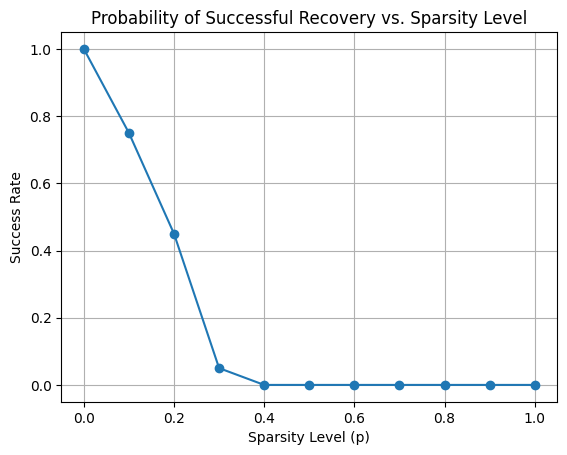

In [ ]:
import matplotlib.pyplot as plt

plt.plot(p_values, success_counts, marker='o')
plt.title('Probability of Successful Recovery vs. Sparsity Level')
plt.xlabel('Sparsity Level (p)')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

Success probability decreases as p increases.
Non zero entries increase lead to the decrease of success probability


Q: 1c changing r

In [ ]:
import numpy as np
import cvxpy as cp

# Constant
m = n = 20
p = 0.1
lambda_ = 0.25
r_values = range(1,10)
success_counts = []

for r in r_values:
    success_count = 0
    total_iterations = 20

    for _ in range(total_iterations):

        A = np.random.randn(m, n)
        U, S, V = np.linalg.svd(A, full_matrices=False)
        L0 = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]


        E0 = np.random.rand(m, n)
        S_true = 1 * (E0 > (1 - p))
        X = L0 + S_true


        L = cp.Variable((m, n))
        S_opt = cp.Variable((m, n))
        W1 = cp.Variable((m, n))
        W2 = cp.Variable((m, n))
        Y = cp.Variable((2*m, 2*n), symmetric=True)


        objective = cp.Minimize(0.5 * cp.trace(W1) + 0.5 * cp.trace(W2) + lambda_ * cp.sum(cp.abs(S_opt)))
        constraints = [L + S_opt >= X - 1e-5, L + S_opt <= X + 1e-5, Y >> 0, Y == cp.bmat([[W1, L], [L.T, W2]])]
        problem = cp.Problem(objective, constraints)


        problem.solve()

        # Check
        if problem.status == 'optimal':

            norm_fro_S = np.linalg.norm(S_opt.value - S_true, ord='fro')
            norm_fro_L = np.linalg.norm(L.value - L0, ord='fro')
            print("||S - S0||_fro:", norm_fro_S)
            print("||L - L0||_fro:", norm_fro_L)


            if norm_fro_S < 1e-3 and norm_fro_L < 1e-3:
                success_count += 1
                print("Success")
            else:
                print("Failure")
        else:
            print("Optimization problem was not solved successfully.")

    success_counts.append(success_count / total_iterations)


||S - S0||_fro: 0.00010749165825672367
||L - L0||_fro: 5.7302939272820134e-05
Success
||S - S0||_fro: 6.08884323628953e-05
||L - L0||_fro: 3.67773087089486e-05
Success
||S - S0||_fro: 0.0014147053979769921
||L - L0||_fro: 0.0014254326827459274
Failure
||S - S0||_fro: 0.00014539657783969344
||L - L0||_fro: 0.00013810136435904447
Success
||S - S0||_fro: 0.00014273138979513863
||L - L0||_fro: 7.831137265873618e-05
Success
||S - S0||_fro: 0.3545950166337484
||L - L0||_fro: 0.3545958607593451
Failure
||S - S0||_fro: 7.79166537040657e-05
||L - L0||_fro: 5.010770725104286e-05
Success
||S - S0||_fro: 0.00012106006281611388
||L - L0||_fro: 0.00010610949930176414
Success
||S - S0||_fro: 0.0001118252704887934
||L - L0||_fro: 6.458586212405908e-05
Success
||S - S0||_fro: 0.00011170519298063598
||L - L0||_fro: 8.018478479353069e-05
Success
||S - S0||_fro: 0.00014413561415064014
||L - L0||_fro: 0.00011314350907605926
Success
||S - S0||_fro: 0.00014485299520421594
||L - L0||_fro: 7.917045664776351e-0

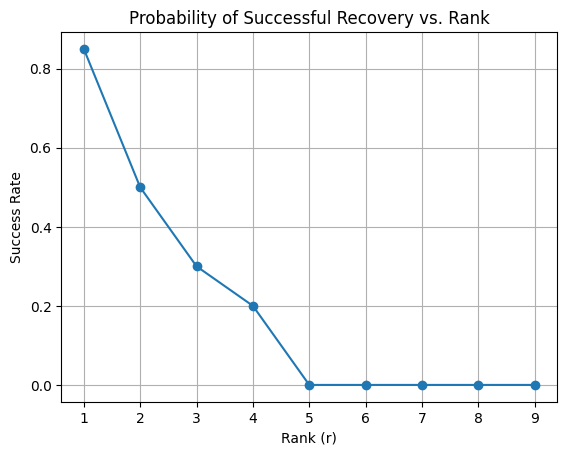

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r_values, success_counts, marker='o')
plt.title('Probability of Successful Recovery vs. Rank')
plt.xlabel('Rank (r)')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

Increase of rank leads to a decrease in success rate

In [ ]:
import numpy as np
import cvxpy as cp

# Constants
m = 100
n = 100
r = 1
p = 0.1
lambda_ = 0.25

#  low-rank matrix
A = np.random.randn(m, n)
U, S, V = np.linalg.svd(A, full_matrices=False)
L0 = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]


E0 = np.random.rand(m, n)
S0 = 1 * (E0 > (1 - p))
X = L0 + S0

#  variables
L = cp.Variable((m, n))
S = cp.Variable((m, n))
W1 = cp.Variable((m, n))
W2 = cp.Variable((m, n))


#  problem
objective = cp.Minimize(0.5 * cp.trace(W1) + 0.5 * cp.trace(W2) + lambda_ * cp.sum(cp.abs(S)))
constraints = [L + S >= X - 1e-5, L + S <= X + 1e-5, cp.bmat([[W1, L], [L.T, W2]])>>0]
problem = cp.Problem(objective, constraints)

# Solve problem
problem.solve()

# Check
if problem.status == 'optimal':
    # Calculate differences
    norm_fro_S = np.linalg.norm(S.value - S0, ord='fro')
    norm_fro_L = np.linalg.norm(L.value - L0, ord='fro')

    # D
    print("||S - S0||_fro:", norm_fro_S)
    print("||L - L0||_fro:", norm_fro_L)

    # C success
    if norm_fro_S < 1e-3 and norm_fro_L < 1e-3:
        print("Success")
    else:
        print("Failure")
else:
    print("Optimization problem was not solved successfully.")

||S - S0||_fro: 21.74251394530602
||L - L0||_fro: 21.742487099912974
Failure


In [ ]:
Q1d Augmented Lagrange Multiplier method

In [ ]:
import numpy as np

def alm_rpca(M, r, lambd=1, mu=10, epsilon=1e-6, max_iter=100):
    m, n = M.shape
    L = np.zeros((m, n))
    S = np.zeros((m, n))
    Y = np.zeros((m, n))

    for _ in range(max_iter):
        #
        U, s, Vt = np.linalg.svd(M - S + (1 / mu) * Y, full_matrices=False)
        s_thresh = np.maximum(s - (1 / mu) * lambd, 0)
        L = U @ np.diag(s_thresh) @ Vt

        #
        S = np.sign(M - L + (1 / mu) * Y) * np.maximum(np.abs(M - L + (1 / mu) * Y) - (1 / mu) * lambd, 0)

        # Update
        Y += mu * (M - L - S)

        #  convergence n
        if np.linalg.norm(M - L - S, 'fro') / np.linalg.norm(M, 'fro') < epsilon:
            break

    return L, S

#
m = n = 1000
r = 1
M = np.random.randn(m, n)

#
L, S = alm_rpca(M, r)

# error
reconstruction_error = np.linalg.norm(M - L - S, 'fro') / np.linalg.norm(M, 'fro')
print("Reconstruction error:", reconstruction_error)


Reconstruction error: 8.821356661444131e-07


Question 2

Cov(V1,V1) = 290,
Cov(V2,V2) = 300,
Cov(V3,V3) = 283.78,
Cov(V1,V2) = 0,
Cov(V1,V3) = -87,
Cov(V2,V3) = 277.5





In [2]:
import numpy as np

# Define parameters
n_samples = 1000

# covariances V1, V2, and V3
cov_v1 = 290
cov_v2 = 300
cov_v3 = 283.78
cov_v1_v2 = 0
cov_v1_v3 = -0.3 * np.sqrt(cov_v1 * cov_v1)
cov_v2_v3 = 0.925 * np.sqrt(cov_v2 * cov_v2)

cov_X = np.zeros((10, 10))

for i in range(4):
    for j in range(4):

      cov_X[i, j] = cov_v1
      cov_X[i+4, j+4] = cov_v2
      if (i>1)&(j>1):
        cov_X[i+6, j+6] = cov_v3

for i in range(0,4):
    for j in range(8,10):
        cov_X[i,j] = cov_v1_v3
        cov_X[j,i] = cov_v1_v3

for i in range(4,8):
    for j in range(8,10):
        cov_X[i,j] = cov_v2_v3
        cov_X[j,i] = cov_v2_v3

# Compute true covariance matrix
true_covariance_matrix = cov_X

# Generate n samples for observed variables X
np.random.seed(0)  # Set random seed for reproducibility
X = np.zeros((n_samples, 10))
for i in range(n_samples):
    V1 = np.random.normal(0, np.sqrt(cov_v1))
    V2 = np.random.normal(0, np.sqrt(cov_v2))
    V3 = -0.3 * V1 + 0.925 * V2 + np.random.normal(0, 1)
    for j in range(4):
        X[i, j] = V1 + np.random.normal(0, 1)

    for j in range(4,8):
        X[i, j] = V2 + np.random.normal(0, 1)

    for j in range(8,10):
        X[i, j] = V3 + np.random.normal(0, 1)
# Compute sample covariance matrix
sample_covariance_matrix = np.cov(X, rowvar=False)

# Display the true covariance matrix and the sample covariance matrix
print("True Covariance Matrix :")
print(true_covariance_matrix)

print("\nSample Covariance Matrix:")
print(sample_covariance_matrix)



True Covariance Matrix :
[[290.   290.   290.   290.     0.     0.     0.     0.   -87.   -87.  ]
 [290.   290.   290.   290.     0.     0.     0.     0.   -87.   -87.  ]
 [290.   290.   290.   290.     0.     0.     0.     0.   -87.   -87.  ]
 [290.   290.   290.   290.     0.     0.     0.     0.   -87.   -87.  ]
 [  0.     0.     0.     0.   300.   300.   300.   300.   277.5  277.5 ]
 [  0.     0.     0.     0.   300.   300.   300.   300.   277.5  277.5 ]
 [  0.     0.     0.     0.   300.   300.   300.   300.   277.5  277.5 ]
 [  0.     0.     0.     0.   300.   300.   300.   300.   277.5  277.5 ]
 [-87.   -87.   -87.   -87.   277.5  277.5  277.5  277.5  283.78 283.78]
 [-87.   -87.   -87.   -87.   277.5  277.5  277.5  277.5  283.78 283.78]]

Sample Covariance Matrix:
[[ 2.78528824e+02  2.77760180e+02  2.78078658e+02  2.77675641e+02
   4.99788211e-02  7.19647794e-01  9.66044093e-01  8.57114639e-01
  -8.39641465e+01 -8.31615381e+01]
 [ 2.77760180e+02  2.78983206e+02  2.78269224e+02 

In [3]:
# Question 2b

# Compute eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_X)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Extract the top 4 principal components
top_4_components = eigenvectors[:, :4]

# Print the top 4 principal components
print("Top 4 Principal Components:")
print(top_4_components)


Top 4 Principal Components:
[[-1.15712698e-01 -4.78497537e-01  8.74681575e-02 -5.83163489e-01]
 [-1.15712698e-01 -4.78497537e-01  8.74681575e-02  7.52031707e-01]
 [-1.15712698e-01 -4.78497537e-01  8.74681575e-02 -2.61427749e-01]
 [-1.15712698e-01 -4.78497537e-01  8.74681575e-02  9.25595308e-02]
 [ 3.95318146e-01 -1.44895223e-01 -2.69683033e-01 -6.60457763e-02]
 [ 3.95318146e-01 -1.44895223e-01 -2.69683033e-01  6.60623217e-02]
 [ 3.95318146e-01 -1.44895223e-01 -2.69683033e-01 -6.60788670e-02]
 [ 3.95318146e-01 -1.44895223e-01 -2.69683033e-01  6.60623217e-02]
 [ 4.00834468e-01  9.53745202e-03  5.82443788e-01  2.66731082e-14]
 [ 4.00834468e-01  9.53745202e-03  5.82443788e-01  2.66731082e-14]]


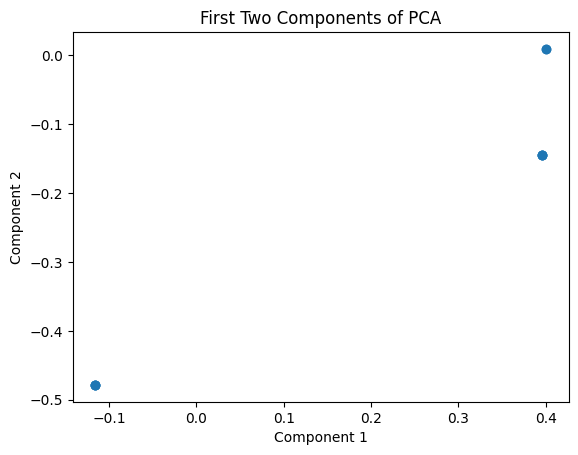

In [8]:
import numpy as np
import matplotlib.pyplot as plt

component_1 = top_4_components[:, 0]
component_2 = top_4_components[:, 1]

plt.scatter(component_1, component_2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First Two Components of PCA')
plt.show()

In [5]:
component_1

array([-0.1157127 , -0.1157127 , -0.1157127 , -0.1157127 ,  0.39531815,
        0.39531815,  0.39531815,  0.39531815,  0.40083447,  0.40083447])

Question 2c

In [6]:
import cvxpy as cp
import numpy as np

n = 10

# Define the variable X
X = cp.Variable((n, n), PSD=True)

# Define the objective function
objective = cp.Maximize(cp.trace(cov_X @ X) - 0.0 * cp.norm(X, 1))

# Define the constraints
constraints = [cp.trace(X) == 1]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(solver=cp.SCS)

# Extract the solution
sparse_principal_component = X.value

# Print the sparse principal component
print("Sparse Principal Component:")
print(sparse_principal_component)


Sparse Principal Component:
[[ 0.01338942  0.01338943  0.01338943  0.01338943 -0.04574333 -0.04574333
  -0.04574333 -0.04574333 -0.04638164 -0.04638164]
 [ 0.01338943  0.01338942  0.01338943  0.01338943 -0.04574333 -0.04574333
  -0.04574333 -0.04574333 -0.04638164 -0.04638164]
 [ 0.01338943  0.01338943  0.01338942  0.01338943 -0.04574333 -0.04574333
  -0.04574333 -0.04574333 -0.04638164 -0.04638164]
 [ 0.01338943  0.01338943  0.01338943  0.01338942 -0.04574333 -0.04574333
  -0.04574333 -0.04574333 -0.04638164 -0.04638164]
 [-0.04574333 -0.04574333 -0.04574333 -0.04574333  0.15627644  0.15627644
   0.15627644  0.15627644  0.15845714  0.15845714]
 [-0.04574333 -0.04574333 -0.04574333 -0.04574333  0.15627644  0.15627644
   0.15627644  0.15627644  0.15845714  0.15845714]
 [-0.04574333 -0.04574333 -0.04574333 -0.04574333  0.15627644  0.15627644
   0.15627644  0.15627644  0.15845714  0.15845714]
 [-0.04574333 -0.04574333 -0.04574333 -0.04574333  0.15627644  0.15627644
   0.15627644  0.156276

In [11]:
import cvxpy as cp
import numpy as np

n = 10

# Define the variable X
#X = cp.Variable((n, n), PSD=True)

for lmd in range(1,15):

    X = cp.Variable((n, n), PSD=True)
    # Define the objective function
    objective = cp.Maximize(cp.trace(cov_X @ X) - lmd * cp.norm(X, 1))

    # Define the constraints
    constraints = [cp.trace(X) == 1]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve(solver=cp.SCS)

    # Extract the solution
    sparse_principal_component = X.value

    # Print the sparse principal component
    #print("Sparse Principal Component:")
    #print(sparse_principal_component)

    eigenvalues, eigenvectors = np.linalg.eig(sparse_principal_component)

    index_max_eigenvalue = np.argmax(eigenvalues)

    first = eigenvectors[:, index_max_eigenvalue]
    #first = eigenvectors[:, 0]

    print("First Sparse Principal Component for lambda = :", lmd)
    print(first)

First Sparse Principal Component for lambda = : 1
[ 0.1155235   0.1155235   0.1155235   0.1155235  -0.39550588 -0.39550588
 -0.39550588 -0.39550588 -0.40057315 -0.40057315]
First Sparse Principal Component for lambda = : 2
[ 0.11533373  0.11533373  0.11533373  0.11533373 -0.39569372 -0.39569372
 -0.39569372 -0.39569372 -0.40031141 -0.40031141]
First Sparse Principal Component for lambda = : 3
[ 0.11514335  0.11514335  0.11514335  0.11514335 -0.3958817  -0.3958817
 -0.3958817  -0.3958817  -0.40004921 -0.40004921]
First Sparse Principal Component for lambda = : 4
[ 0.11495237  0.11495237  0.11495237  0.11495237 -0.39606981 -0.39606981
 -0.39606981 -0.39606981 -0.39978658 -0.39978658]
First Sparse Principal Component for lambda = : 5
[ 0.1147608   0.1147608   0.1147608   0.1147608  -0.39625803 -0.39625803
 -0.39625803 -0.39625803 -0.39952354 -0.39952354]
First Sparse Principal Component for lambda = : 6
[ 0.11456863  0.11456863  0.11456863  0.11456863 -0.39644639 -0.39644639
 -0.39644639 

As lambda increases the difference between normal PCA and sparse PCA decreases

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(sparse_principal_component)

index_max_eigenvalue = np.argmax(eigenvalues)

first = eigenvectors[:, index_max_eigenvalue]
#first = eigenvectors[:, 0]

print("First Sparse Principal Component:")
print(first)

First Sparse Principal Component:
[ 0.1157127   0.1157127   0.1157127   0.1157127  -0.39531815 -0.39531815
 -0.39531815 -0.39531815 -0.40083447 -0.40083447]


2d remove first pc

In [8]:
# Compute the outer product of the first sparse principal component with itself
x1= np.outer(first, first)

# Remove the contribution of the first sparse principal component from the covariance matrix
cov_X_1 = cov_X - x1 * np.dot(first, cov_X)  # Subtracting the outer product of x1 with itself scaled by the dot product of x1 with cov_matrix

#cov_X_1 = cov_X - np.outer(first, first)
#cov_X_1

X = cp.Variable((n, n), PSD=True)

# Define the objective function
objective = cp.Maximize(cp.trace(cov_X_1 @ X) - 0.0 * cp.norm(X, 1))

# Define the constraints
constraints = [cp.trace(X) == 1]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(solver=cp.SCS)

# Extract the solution
sparsepc = X.value

# Print the sparse principal component
print("Sparse Principal Component:")
print(sparsepc)


Sparse Principal Component:
[[ 0.00589003  0.00588316  0.00588316  0.00588316 -0.03098744 -0.03098744
  -0.03098744 -0.03098744 -0.0310194  -0.0310194 ]
 [ 0.00588316  0.00589003  0.00588316  0.00588316 -0.03098744 -0.03098744
  -0.03098744 -0.03098744 -0.0310194  -0.0310194 ]
 [ 0.00588316  0.00588316  0.00589003  0.00588316 -0.03098744 -0.03098744
  -0.03098744 -0.03098744 -0.0310194  -0.0310194 ]
 [ 0.00588316  0.00588316  0.00588316  0.00589003 -0.03098744 -0.03098744
  -0.03098744 -0.03098744 -0.0310194  -0.0310194 ]
 [-0.03098744 -0.03098744 -0.03098744 -0.03098744  0.16260508  0.16260237
   0.16260237  0.16260237  0.16280575  0.16280575]
 [-0.03098744 -0.03098744 -0.03098744 -0.03098744  0.16260237  0.16260508
   0.16260237  0.16260237  0.16280575  0.16280575]
 [-0.03098744 -0.03098744 -0.03098744 -0.03098744  0.16260237  0.16260237
   0.16260508  0.16260237  0.16280575  0.16280575]
 [-0.03098744 -0.03098744 -0.03098744 -0.03098744  0.16260237  0.16260237
   0.16260237  0.162605

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(sparsepc)

#
index_max_eigenvalue = np.argmax(eigenvalues)

#
second = eigenvectors[:, index_max_eigenvalue]

#
print("Second Sparse Principal Component:")
print(second)

second Sparse Principal Component:
[ 0.0768328   0.0768328   0.0768328   0.0768328  -0.4032326  -0.4032326
 -0.4032326  -0.4032326  -0.40373306 -0.40373306]


2e remove 3rd and 4th

In [10]:
x2= np.outer(second, second)

# Remove the contribution of the first sparse principal component from the covariance matrix
cov_X_2 = cov_X_1 - x2 * np.dot(first, cov_X_1)  # Subtracting the outer product of x1 with itself scaled by the dot product of x1 with cov_matrix

#cov_X_1 = cov_X - np.outer(first, first)
#cov_X_1

X = cp.Variable((n, n), PSD=True)

# Define the objective function
objective = cp.Maximize(cp.trace(cov_X_2 @ X) - 0.0 * cp.norm(X, 1))

# Define the constraints
constraints = [cp.trace(X) == 1]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(solver=cp.SCS)

# Extract the solution
sparsepc2 = X.value

# Print the sparse principal component
print("Sparse Principal Component:")
print(sparsepc2)

Sparse Principal Component:
[[ 0.00329828  0.00329226  0.00329226  0.00329226 -0.02332979 -0.02332979
  -0.02332979 -0.02332979 -0.02329625 -0.02329625]
 [ 0.00329226  0.00329828  0.00329226  0.00329226 -0.02332979 -0.02332979
  -0.02332979 -0.02332979 -0.02329625 -0.02329625]
 [ 0.00329226  0.00329226  0.00329828  0.00329226 -0.02332979 -0.02332979
  -0.02332979 -0.02332979 -0.02329625 -0.02329625]
 [ 0.00329226  0.00329226  0.00329226  0.00329828 -0.02332979 -0.02332979
  -0.02332979 -0.02332979 -0.02329625 -0.02329625]
 [-0.02332979 -0.02332979 -0.02332979 -0.02332979  0.16460506  0.1646033
   0.1646033   0.1646033   0.16439805  0.16439805]
 [-0.02332979 -0.02332979 -0.02332979 -0.02332979  0.1646033   0.16460506
   0.1646033   0.1646033   0.16439805  0.16439805]
 [-0.02332979 -0.02332979 -0.02332979 -0.02332979  0.1646033   0.1646033
   0.16460506  0.1646033   0.16439805  0.16439805]
 [-0.02332979 -0.02332979 -0.02332979 -0.02332979  0.1646033   0.1646033
   0.1646033   0.16460506 

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(sparsepc2)

#
index_max_eigenvalue = np.argmax(eigenvalues)

#
third = eigenvectors[:, index_max_eigenvalue]

#
print("Third Sparse Principal Component:")
print(third)

Third Sparse Principal Component:
[ 0.05749593  0.05749593  0.05749593  0.05749593 -0.40570944 -0.40570944
 -0.40570944 -0.40570944 -0.40520135 -0.40520135]


In [12]:
x3= np.outer(third, third)

# Remove the contribution of the first sparse principal component from the covariance matrix
cov_X_3 = cov_X_2 - x3 * np.dot(first, cov_X_2)  # Subtracting the outer product of x1 with itself scaled by the dot product of x1 with cov_matrix

#cov_X_1 = cov_X - np.outer(first, first)
#cov_X_1

X = cp.Variable((n, n), PSD=True)

# Define the objective function
objective = cp.Maximize(cp.trace(cov_X_3 @ X) - 0.0 * cp.norm(X, 1))

# Define the constraints
constraints = [cp.trace(X) == 1]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(solver=cp.SCS)

# Extract the solution
sparsepc3 = X.value

# Print the sparse principal component
print("Sparse Principal Component:")
print(sparsepc3)

Sparse Principal Component:
[[ 0.00205985  0.00205461  0.00205461  0.00205461 -0.01847237 -0.01847237
  -0.01847237 -0.01847237 -0.01845408 -0.01845408]
 [ 0.00205461  0.00205985  0.00205461  0.00205461 -0.01847237 -0.01847237
  -0.01847237 -0.01847237 -0.01845408 -0.01845408]
 [ 0.00205461  0.00205461  0.00205985  0.00205461 -0.01847237 -0.01847237
  -0.01847237 -0.01847237 -0.01845408 -0.01845408]
 [ 0.00205461  0.00205461  0.00205461  0.00205985 -0.01847237 -0.01847237
  -0.01847237 -0.01847237 -0.01845408 -0.01845408]
 [-0.01847237 -0.01847237 -0.01847237 -0.01847237  0.16538682  0.16538585
   0.16538585  0.16538585  0.16524616  0.16524616]
 [-0.01847237 -0.01847237 -0.01847237 -0.01847237  0.16538585  0.16538682
   0.16538585  0.16538585  0.16524616  0.16524616]
 [-0.01847237 -0.01847237 -0.01847237 -0.01847237  0.16538585  0.16538585
   0.16538682  0.16538585  0.16524616  0.16524616]
 [-0.01847237 -0.01847237 -0.01847237 -0.01847237  0.16538585  0.16538585
   0.16538585  0.165386

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(sparsepc3)

#
index_max_eigenvalue = np.argmax(eigenvalues)

#
fourth = eigenvectors[:, index_max_eigenvalue]

#
print("Fourth Sparse Principal Component:")
print(fourth)

Fourth Sparse Principal Component:
[ 0.04541906  0.04541906  0.04541906  0.04541906 -0.40667533 -0.40667533
 -0.40667533 -0.40667533 -0.40633062 -0.40633062]
